# **CLASSIFIER COMPARISONS**

In this following notebook, I will be carrying out comparisons between the classifiers which may be used in my Intrusion Detection System implementation. 

My implementation requires 2 classifiers:



*   Intrusion Detection Classifier: This classifier determines whether an intrusion had in fact occured or not.
*   Attack Type Classifier: This classifier determines the attack type which is occuring. From this output, a suitable response to the incident should be formulated.



In [1]:
#IMPORT ALL NECCESSARY PACKAGES#
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#MOUNT DRIVE#
from google.colab import drive
drive.mount('/content/drive/')

#IMPORT PREPROCESSED DATA FROM THE preprocessing.ipynb NOTEBOOK#
sng_traindata = pd.read_csv("/content/drive/My Drive/DISSERTATION/dataset/nsl_kdd_sng_traindata.csv")
sng_traindata = sng_traindata.drop('Unnamed: 0',axis=1)
display(sng_traindata)
sng_testdata = pd.read_csv("/content/drive/My Drive/DISSERTATION/dataset/nsl_kdd_sng_testdata.csv")
sng_testdata = sng_testdata.drop('Unnamed: 0',axis=1)
display(sng_testdata)


Mounted at /content/drive/


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_occur,attack_class
0,0,1,0,0,0,0,0,0,0,0,...,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,0,NaN
1,0,0,1,0,0,0,0,0,0,0,...,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
2,0,1,0,0,0,0,0,0,0,0,...,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos
3,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,0,NaN
4,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos
125969,0,0,1,0,0,0,0,0,0,0,...,-0.381775,-0.440428,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
125970,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,1.082567,-0.584813,-0.391090,-0.406815,normal,0,NaN
125971,0,1,0,0,0,0,0,0,0,0,...,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_occur,attack_class
0,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune,1,ddos
1,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756,neptune,1,ddos
2,0,1,0,0,0,0,0,0,0,0,...,-0.227217,1.503606,-0.097121,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
3,1,0,0,0,0,0,0,0,0,0,...,-0.433294,2.767228,2.288754,-0.597720,-0.584813,-0.422074,-0.406815,saint,1,probe
4,0,1,0,0,0,0,0,0,0,0,...,0.442537,-0.375627,-0.097121,-0.597720,-0.584813,2.149655,1.710811,mscan,1,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,NaN
22540,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,NaN
22541,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,back,1,ddos
22542,0,0,1,0,0,0,0,0,0,0,...,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN


In [2]:
#NUMBER OF TRAINING AND TEST DATA ROWS#
max_train_cols = 125973
max_test_cols = 22544

In [3]:
#TRAIN AND TEST DATA IS CONCATENATED FOR LATER USE IN A NIDS SIMULATION#
sng_alldata = pd.concat([sng_traindata, sng_testdata], axis=0, ignore_index=True)
display(sng_alldata)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_occur,attack_class
0,0,1,0,0,0,0,0,0,0,0,...,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,0,NaN
1,0,0,1,0,0,0,0,0,0,0,...,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
2,0,1,0,0,0,0,0,0,0,0,...,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,1,ddos
3,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,0,NaN
4,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,0,0,0,0,0,0,0,0,...,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,NaN
148513,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,0,NaN
148514,0,1,0,0,0,0,0,0,0,0,...,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,back,1,ddos
148515,0,0,1,0,0,0,0,0,0,0,...,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,0,NaN


**SPLITING TRAIN AND TEST DATA**

Both of the datasets are split into x (data) and y (labels). 

This enables supervised learning and testing of the classifiers.

In [4]:
#REMOVE UNNECCESSARY COLUMNS FROM TRAINING DATA#
sng_traindata = sng_traindata.drop(['attack','attack_class'],axis=1)

#LABELS FOR SUPERVISED LEARNING (TRAINING DATA)#
sng_y_train = sng_traindata['attack_occur']

#DATA FOR SUPERVISED LEARNING (TRAINING DATA)#
sng_x_train = sng_traindata.drop('attack_occur',axis=1)

#REMOVE UNNECCESSARY COLUMNS FROM TEST DATA#
sng_testdata = sng_testdata.drop(['attack','attack_class'],axis=1)

#LABELS FOR CLASSIFIER TESTING#
sng_y_test = sng_testdata['attack_occur']

#DATA FOR CLASSIFIER TESTING#
sng_x_test = sng_testdata.drop('attack_occur',axis=1)

# **FIRST LAYER CLASSIFIER: INTRUSION ANALYSIS CLASSIFIER**

**MODEL EVALUATION FUNCTION**

The following function enables the models to be tested on the following concepts:



*   Confusion Matrix: This provides us with essential insights into False Positive and more importantly False Negative results of the classifier.
*   Classification Report: Provides precision, recall and f1-score results. 
*   AUC-ROC Curve (Area Under Curve - Receiver Operating Characteristics Curve): Acts as a performance measure, the higher the AUC is the higher the precision of the model is.

The first layer classifier is evluated against the following criteria:


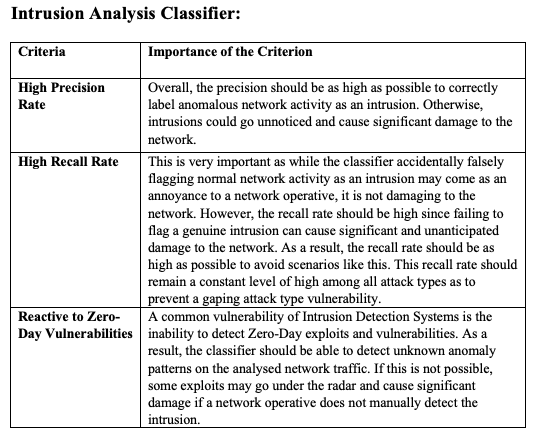

In [5]:
def evaluate_model2(classifier, x, y, y_pred, title):

  #CALCULATE ESSENTIAL COMPARISON METRICS#
  accuracy = metrics.accuracy_score(y,y_pred)
  precision = metrics.precision_score(y,y_pred)
  recall = metrics.recall_score(y, y_pred)
  bal_accuracy = metrics.balanced_accuracy_score(y, y_pred)
  
  #PRINT CONFUSION MATRIX OF MODEL#
  print('\nCONFUSION MATRIX')
  print('-----------------\n')
  plot_confusion_matrix(classifier, x,y)
  plt.title(title + 'CONFUSION MATRIX')
  plt.show()

  #PRINT CLASSIFICATION REPORT OF MODEL#
  print('\nCLASSIFICATION REPORT')
  print('----------------------\n')
  classification_rep = classification_report(y, y_pred)
  print(classification_rep)

  #CALCULATE AUC-ROC CURVE AND PLOT#
  print('\nAUC CURVE')
  print('----------------------\n')
  print()
  print('Accuracy: '+ str(accuracy) + '\n')
  y_probability = classifier.predict_proba(x)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y,  y_probability)
  auc = metrics.roc_auc_score(y, y_probability)
  plt.plot(fpr,tpr,label= "classifier , AUC = "+str(auc))
  plt.legend(loc=4)
  plt.title(title + ' AUC')
  plt.show()

  return precision, recall 


**DECISION TREE CLASSIFIER**

In [6]:
from sklearn import tree
from sklearn import metrics

def dt_eval(train_num, test_num, x_train, y_train, x_test, y_test):

  #PRINT NAME OF CLASSIFIER#
  print('\n==============================')
  print('========DECISION TREE=========')
  print('==============================\n')

  #CREATE DECISION TREE CLASSIFIER#
  dt_clf = tree.DecisionTreeClassifier()

  #TRAIN DECISION TREE CLASSIFIER#
  dt_clf.fit(x_train.iloc[:train_num],y_train.iloc[:train_num])

  #EVALUATE TRAINING DATA#
  print('\nTRAINING DATA EVALUATION\n')
  train_pred = dt_clf.predict(x_train.iloc[:train_num])
  train_precision, train_recall = evaluate_model2(dt_clf, x_train, y_train, train_pred, 'DECISION TREE TRAINING DATA')

  #EVALUATE TEST DATA#
  print('\nTESTING DATA EVALUATION\n')
  y_pred = dt_clf.predict(x_test.iloc[:test_num])
  precision, recall = evaluate_model2(dt_clf, x_test, y_test,y_pred, 'DECISION TREE TEST DATA')

  return 'Decision Tree', precision, recall


**NAIVE BAYES CLASSIFIER**

In [7]:
from sklearn.naive_bayes import GaussianNB

def nb_eval(train_num, test_num, x_train, y_train, x_test, y_test):

  #PRINT NAME OF CLASSIFIER#
  print('\n==============================')
  print('=========NAIVE BAYES==========')
  print('==============================\n')

  #INSTANTIATE AND TRAIN CLASSIFIER#
  gnb_clf = GaussianNB()
  gnb_clf.fit(x_train.iloc[:train_num], y_train.iloc[:train_num])

  #EVALUATE TRAIN DATA#
  print('\nTRAINING DATA EVALUATION\n')
  train_pred = gnb_clf.predict(x_train.iloc[:train_num])
  train_precision, train_recall = evaluate_model2(gnb_clf, x_train, y_train, train_pred, 'NAIVE BAYES TRAINING DATA')

  #EVALUATE TEST DATA#
  print('\nTESTING DATA EVALUATION\n')
  y_pred = gnb_clf.predict(x_test.iloc[:test_num])
  precision, recall = evaluate_model2(gnb_clf, x_test, y_test, y_pred, 'NAIVE BAYES TEST DATA')

  return 'Naive Bayes', precision, recall

**K NEAREST NEIGHBOUR CLASSIFIER**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

def knn_eval(train_num, test_num, x_train, y_train, x_test, y_test):
  
  #PRINT NAME OF CLASSIFIER#
  print('\n==============================')
  print('=============KNN==============')
  print('==============================\n')

  #INSTANTIATE AND TRAIN CLASSIFIER#
  knn_clf = KNeighborsClassifier(n_neighbors=5)
  knn_clf.fit(x_train, y_train)

  #EVALUATE TRAIN DATA#
  print('\nTRAINING DATA EVALUATION\n')
  train_pred = knn_clf.predict(x_train.iloc[:train_num])
  train_precision, train_recall = evaluate_model2(knn_clf, x_train, y_train, train_pred, 'KNN TRAINING DATA')

  #EVALUATE TEST DATA#
  print('\nTESTING DATA EVALUATION\n')
  y_pred = knn_clf.predict(x_test.iloc[:test_num])
  precision, recall = evaluate_model2(knn_clf, x_test, y_test, y_pred, 'KNN TEST DATA')

  return 'K Nearest Neighbour', precision, recall


# **EVALUATION OF INTRUSION ANALYSIS MODELS**

In order to actually execute the functions above, the train and test datasets are first concatenated together and then re-split up into the train and data datasets (as to balance attack-type representation). 

This is done using the train_test_split() function as to give more control over the dataset sizes. 

In [9]:
from sklearn.model_selection import train_test_split
import warnings
#INSIGNIFICANT FUTURE WARNINGS ARE IGNORED#
warnings.filterwarnings('ignore')

#TRAIN AND TEST DATASETS ARE CONCATENATED#
sng_data = pd.concat([sng_traindata,sng_testdata], axis=0)

#DATA IS SPLIT FROM ITS RESPECTIVE LABELS#
sng_data_exp = sng_data.copy()
sng_target = sng_data['attack_occur']
del sng_data['attack_occur']

#DATASETS ARE RESPLIT IN THE RATIO OF 0.3 (30% IS TEST DATA, 70% IS TRAIN DATA)#
x_train, x_test, y_train, y_test = train_test_split(sng_data, sng_target, test_size=0.3)


**DECISION TREE EVALUATION**


========DECISION TREE=========


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



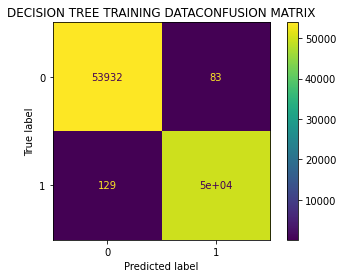


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54015
           1       1.00      1.00      1.00     49946

    accuracy                           1.00    103961
   macro avg       1.00      1.00      1.00    103961
weighted avg       1.00      1.00      1.00    103961


AUC CURVE
----------------------


Accuracy: 0.9979607737516953



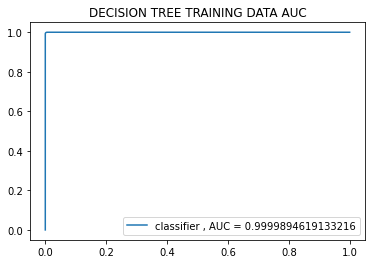


TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



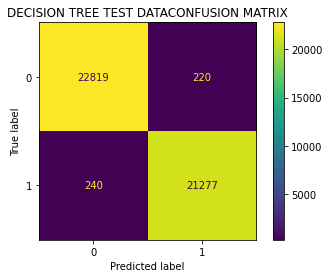


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23039
           1       0.99      0.99      0.99     21517

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556


AUC CURVE
----------------------


Accuracy: 0.9896759134572224



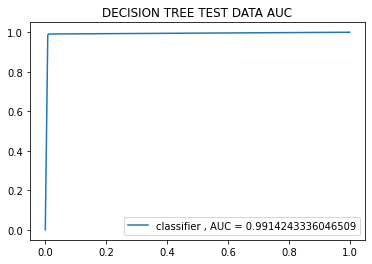

In [10]:
dt_name, dt_precision, dt_recall = dt_eval(len(x_train.index),len(x_test.index), x_train, y_train, x_test, y_test)

**NAIVE BAYES EVALUATION**


=========NAIVE BAYES==========


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



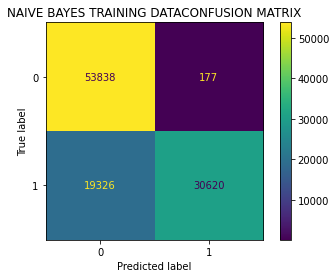


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     54015
           1       0.99      0.61      0.76     49946

    accuracy                           0.81    103961
   macro avg       0.87      0.80      0.80    103961
weighted avg       0.86      0.81      0.80    103961


AUC CURVE
----------------------


Accuracy: 0.8124008041477092



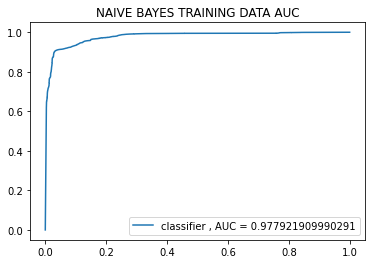


TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



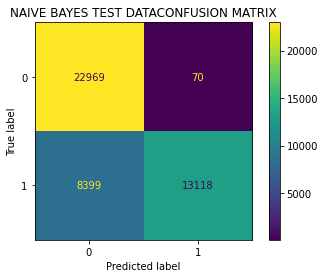


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     23039
           1       0.99      0.61      0.76     21517

    accuracy                           0.81     44556
   macro avg       0.86      0.80      0.80     44556
weighted avg       0.86      0.81      0.80     44556


AUC CURVE
----------------------


Accuracy: 0.8099245892809049



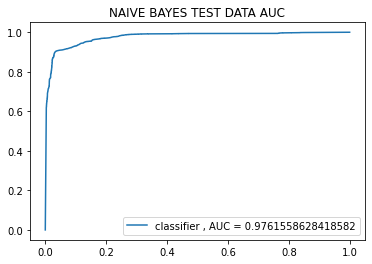

In [11]:
nb_name, nb_precision, nb_recall = nb_eval(len(x_train.index),len(x_test.index), x_train, y_train, x_test, y_test)

**K NEAREST NEIGHBOUR EVALUATION**


=============KNN==============


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



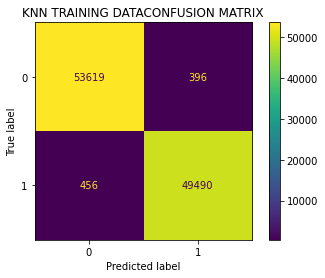


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     54015
           1       0.99      0.99      0.99     49946

    accuracy                           0.99    103961
   macro avg       0.99      0.99      0.99    103961
weighted avg       0.99      0.99      0.99    103961


AUC CURVE
----------------------


Accuracy: 0.9918046190398322



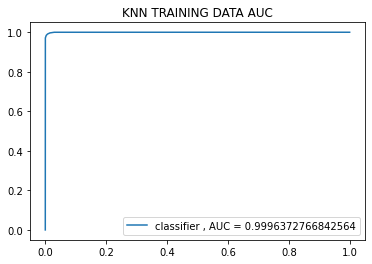


TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



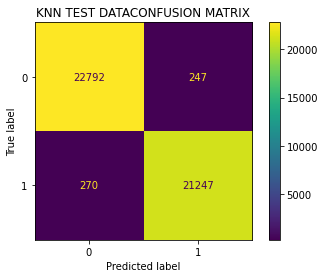


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23039
           1       0.99      0.99      0.99     21517

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556


AUC CURVE
----------------------


Accuracy: 0.9883966244725738



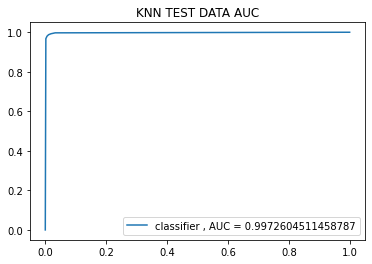

In [12]:
knn_name, knn_precision, knn_recall = knn_eval(len(x_train.index),len(x_test.index), x_train, y_train, x_test, y_test)

**COMPARISON OF INCIDENT DETECTION CLASSIFIERS**

The following section compares the performance of the classifiers in the context of an Incident Detection Classifier. 

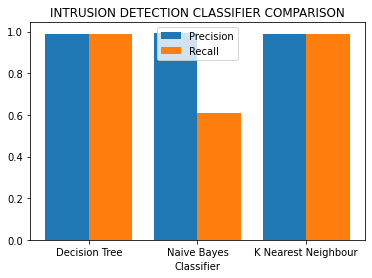

In [13]:
#CLASSIFIER NAMES#
classifier_chart = [str(dt_name),str(nb_name), str(knn_name)]

#PRECISION VALUES#
precision_chart = [dt_precision, nb_precision, knn_precision]

#RECALL VALUES#
recall_chart = [dt_recall, nb_recall, knn_recall]
  
x_axis = np.arange(len(classifier_chart))

#SET UP 2 COMPARISON BARS#  
plt.bar(x_axis - 0.2, precision_chart, 0.4, label = 'Precision')
plt.bar(x_axis + 0.2, recall_chart, 0.4, label = 'Recall')

#PLOT THE BAR CHART#  
plt.xticks(x_axis, classifier_chart)
plt.xlabel("Classifier")
plt.title("INTRUSION DETECTION CLASSIFIER COMPARISON")
plt.legend()
plt.show()

Judging from the performance data collected, the most effective algorithm is the Decision Tree algorithm. This is due to the following:



*   High Precision Percentage (99%).
*   Low False Negative Percentage (0.53%).
*   Fast Training Time (Compared to the other classifiers, important in a network scenario).



# **SECOND LAYER CLASSIFIER: ATTACK CLASS CLASSIFIER**

The following section focuses on evaluating the attack class classifiers.

These classifiers is evaluated against this criteria:

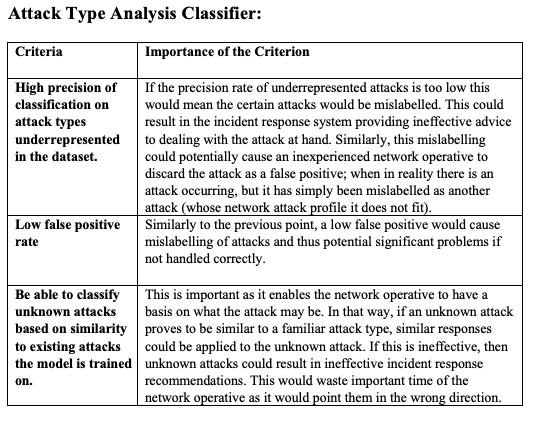

The following classifiers are evaluated in this section:


*   Multi-layer Perceptron
*   K-Nearest Neighbour
*   Decision Tree
*   Hybrid (MLP-DecisionTree) Classifier



This function is very similar to the first layer evaluate_model function. However, due to this being a multi-class scenario, we are unable to plot a AUC-ROC curve due to it being limited to binary classification scenarios.

In [15]:
def evaluate_model_inc2(classifier, x, y, y_pred, title):
  
  #PLOT CONFUSION MATRIX#
  print()
  print('CONFUSION MATRIX')
  print('-----------------')
  print()

  #LARGER CONFUSION MATRIX SQUARE SIZES NECESSARY TO VISUALISE DATA#
  fig, ax = plt.subplots(figsize=(10,10))
  plot_confusion_matrix(classifier, x,y, ax=ax, normalize='true')
  plt.title(title + 'CONFUSION MATRIX')
  plt.show()

  #PLOT CLASSIFICATION REPORT#
  print()
  print('CLASSIFICATION REPORT')
  print('----------------------')
  print()
  classification_rep = classification_report(y, y_pred)
  print(classification_rep)
  print()


**Decision Tree**

In [16]:
def dt_eval_inc(train_num, test_num, x_train, y_train, x_test, y_test):
  dt_clf = tree.DecisionTreeClassifier()

  dt_clf.fit(x_train.iloc[:train_num],y_train.iloc[:train_num])

  y_pred = dt_clf.predict(x_test.iloc[:test_num])

  print()
  print('TRAINING DATA EVALUATION')
  print()
  train_pred = dt_clf.predict(x_train.iloc[:train_num])
  #evaluate_model_inc(y_train.iloc[:train_num], train_pred)
  evaluate_model_inc2(dt_clf, x_train, y_train, train_pred, 'DECISION TREE TRAINING DATA ')
  print()
  print('TESTING DATA EVALUATION')
  print()
  y_pred = dt_clf.predict(x_test.iloc[:test_num])
  #evaluate_model_inc(y_test.iloc[:test_num], y_pred)
  evaluate_model_inc2(dt_clf, x_test, y_test, y_pred, 'DECISION TREE TEST DATA ')


**K-NEAREST NEIGHBOUR**

In [17]:
def knn_eval_inc(train_num, test_num, x_train, y_train, x_test, y_test):
  
  knn_clf = KNeighborsClassifier(n_neighbors=10)

 
  knn_clf.fit(x_train, y_train)

  print()
  print('TRAINING DATA EVALUATION')
  print()
  train_pred = knn_clf.predict(x_train.iloc[:train_num])
  #evaluate_model_inc(y_train.iloc[:train_num], train_pred)
  evaluate_model_inc2(knn_clf, x_train, y_train, train_pred, 'KNN TRAINING DATA')
  print()
  print('TESTING DATA EVALUATION')
  print()
  y_pred = knn_clf.predict(x_test.iloc[:test_num])
  #evaluate_model_inc(y_test.iloc[:test_num], y_pred)
  evaluate_model_inc2(knn_clf, x_test, y_test, y_pred, 'KNN TEST DATA')

**Multi-Layer Perceptron**

In [19]:
from sklearn.neural_network import MLPClassifier

def mlp_eval_inc(train_num, test_num, x_train, y_train, x_test, y_test):
  mlp_clf = MLPClassifier(hidden_layer_sizes=[100]*6)

  mlp_clf.fit(x_train, y_train)

  print()
  print('TRAINING DATA EVALUATION')
  print()
  train_pred = mlp_clf.predict(x_train)
  evaluate_model_inc2(mlp_clf, x_train, y_train, train_pred, 'MLP TRAINING DATA')

  print()
  print('TESTING DATA EVALUATION')
  print()
  y_pred = mlp_clf.predict(x_test)
  #evaluate_model(y_test.iloc[:test_num], y_pred)
  evaluate_model_inc2(mlp_clf, x_test, y_test, y_pred, 'MLP TEST DATA')



**Hybrid (MLP-DecisionTree) Classifier**

This classifier utilises the semantics of a VotingClassifier to combine the MLP and Decision Tree classifiers. 

MLP weighting: 1.1

Decision Tree weighting: 1.0

The structure of the Hybrid Classifier is as shown below:

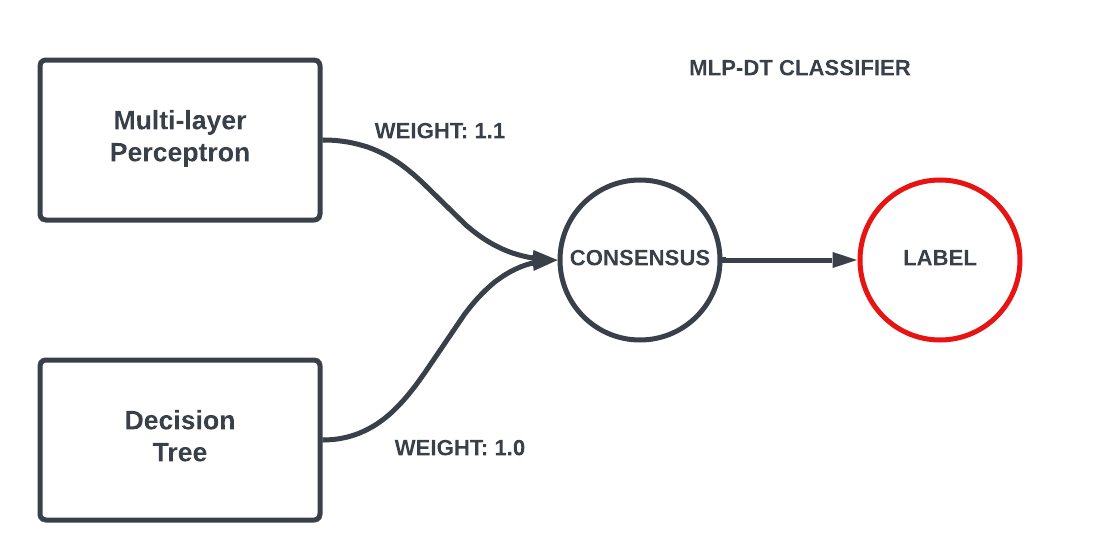

In [20]:
from sklearn.ensemble import VotingClassifier

def hybrid_eval_inc(train_num, test_num, x_train, y_train, x_test, y_test):

  #CREATE MLP CLASSIFIER & FIND PROBABILTY SCORE#
  mlp_clf = MLPClassifier(hidden_layer_sizes=[100]*6)
  score_mlp = mlp_clf.fit(x_train,y_train).score(x_test,y_test)
  
  #CREATE DT CLASSIFIER & FIND PROBABILTY SCORE#
  dt_clf = tree.DecisionTreeClassifier()
  score_dt = dt_clf.fit(x_train,y_train).score(x_test,y_test)

  #COMBINE CLASSIFIERS INTO A VOTING CLASSIFIER#
  hybrid_clf = VotingClassifier(estimators=[('MLP', mlp_clf), ('DT', dt_clf)], voting='soft', weights=[1.1,1])

  #TRAIN HYBRID CLASSIFIER#
  hybrid_clf.fit(x_train,y_train)

  #TRAIN DATA PERFORMANCE METRICS#
  print()
  print('TRAINING DATA EVALUATION')
  print()
  train_pred = hybrid_clf.predict(x_train)
  evaluate_model_inc2(hybrid_clf, x_train, y_train, train_pred, 'HYBRID TRAINING DATA')

  #TEST DATA PERFORMANCE METRICS#
  print()
  print('TESTING DATA EVALUATION')
  print()
  y_pred = hybrid_clf.predict(x_test)
  #evaluate_model(y_test.iloc[:test_num], y_pred)
  evaluate_model_inc2(hybrid_clf, x_test, y_test, y_pred, 'HYBRID TEST DATA')


**ATTACK CLASS CLASSIFICATION**

The 4 main attack classes (DDoS, Probe, U2R and R2L) are labelled via a LabelEncoder(), this enables the classifier to be able to process the data as it is numerical data.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
enc_class = LabelEncoder()

sng_incident_data = sng_alldata.copy()
sng_incident_data = sng_incident_data[sng_incident_data.attack != 'normal']

attack_type = sng_incident_data['attack_class']
incident_data_class = sng_incident_data.drop('attack_class', axis=1)
incident_data_class = incident_data_class.drop(['attack_occur','attack'], axis=1)

number_attack_dataset = attack_type.value_counts()
attack_class_label = attack_type.to_frame()

attack_class_label = attack_class_label.apply(enc_class.fit_transform)
attack_type_mapping = dict(zip(enc_class.classes_,enc_class.transform(enc_class.classes_)))
#display(attack_type_label)
print('ATTACK CLASSES MAPPING')
display(attack_type_mapping)

ATTACK CLASSES MAPPING


{'ddos': 0, 'probe': 1, 'r2l': 2, 'u2r': 3}

the now Label encoded data is split using a train_test_split() method for classifier evaluation.

In [22]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(incident_data_class, attack_class_label, test_size=0.3)


============MLP===============


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



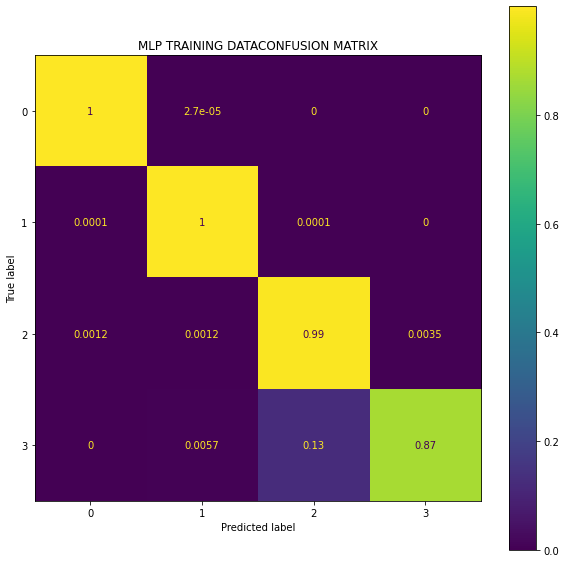


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37392
           1       1.00      1.00      1.00      9856
           2       0.99      0.99      0.99      2601
           3       0.94      0.87      0.90       175

    accuracy                           1.00     50024
   macro avg       0.98      0.97      0.97     50024
weighted avg       1.00      1.00      1.00     50024



TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



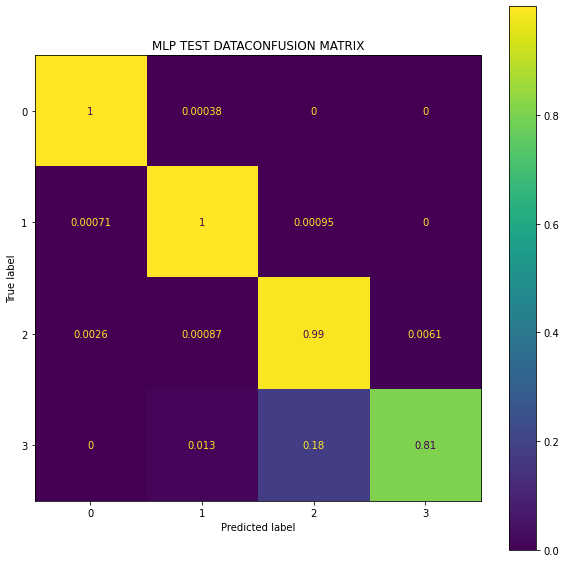


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15993
           1       1.00      1.00      1.00      4221
           2       0.98      0.99      0.99      1148
           3       0.90      0.81      0.85        77

    accuracy                           1.00     21439
   macro avg       0.97      0.95      0.96     21439
weighted avg       1.00      1.00      1.00     21439




In [23]:
print()
print('==============================')
print('============MLP===============')
print('==============================')
print()
mlp_eval_inc(len(x_train_class.index), len(x_test_class.index), x_train_class, y_train_class, x_test_class, y_test_class)


=============KNN==============


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



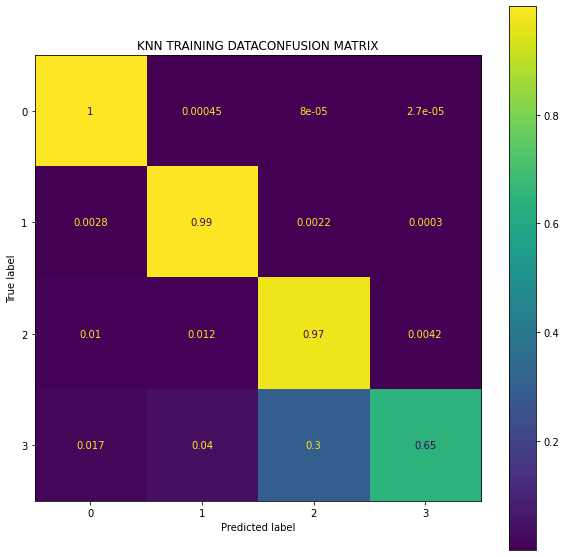


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37392
           1       0.99      0.99      0.99      9856
           2       0.97      0.97      0.97      2601
           3       0.88      0.65      0.75       175

    accuracy                           1.00     50024
   macro avg       0.96      0.90      0.93     50024
weighted avg       1.00      1.00      1.00     50024



TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



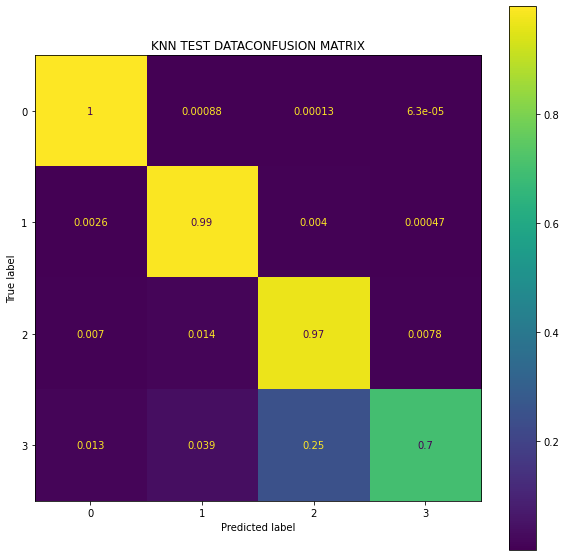


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15993
           1       0.99      0.99      0.99      4221
           2       0.97      0.97      0.97      1148
           3       0.82      0.70      0.76        77

    accuracy                           1.00     21439
   macro avg       0.94      0.92      0.93     21439
weighted avg       1.00      1.00      1.00     21439




In [24]:
print()
print('==============================')
print('=============KNN==============')
print('==============================')
print()
knn_eval_inc(len(x_train_class.index), len(x_test_class.index), x_train_class, y_train_class, x_test_class, y_test_class)


========DECISION TREE=========


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



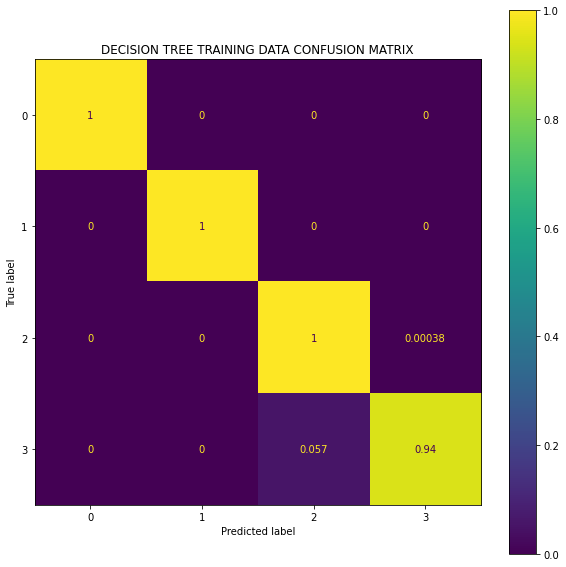


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37392
           1       1.00      1.00      1.00      9856
           2       1.00      1.00      1.00      2601
           3       0.99      0.94      0.97       175

    accuracy                           1.00     50024
   macro avg       1.00      0.99      0.99     50024
weighted avg       1.00      1.00      1.00     50024



TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



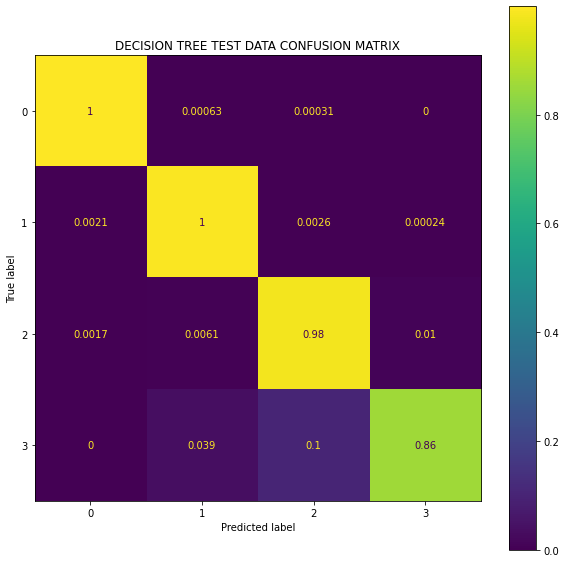


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15993
           1       1.00      1.00      1.00      4221
           2       0.98      0.98      0.98      1148
           3       0.84      0.86      0.85        77

    accuracy                           1.00     21439
   macro avg       0.95      0.96      0.96     21439
weighted avg       1.00      1.00      1.00     21439




In [25]:
print()
print('==============================')
print('========DECISION TREE=========')
print('==============================')
print()
dt_eval_inc(len(x_train_class.index), len(x_test_class.index), x_train_class, y_train_class, x_test_class, y_test_class)


==========HYBRID==============


TRAINING DATA EVALUATION


CONFUSION MATRIX
-----------------



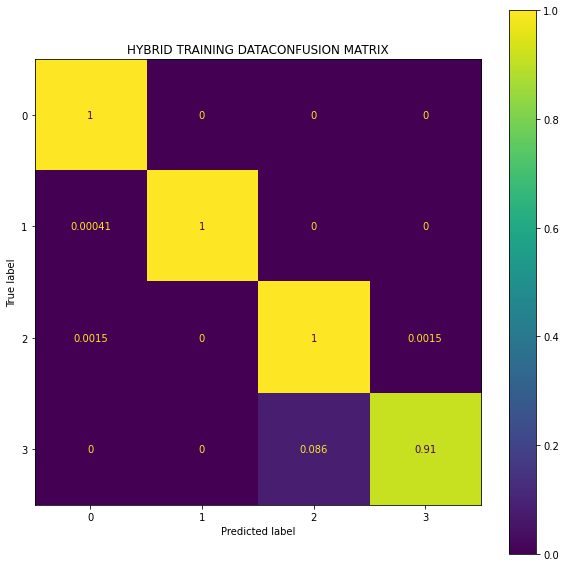


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37392
           1       1.00      1.00      1.00      9856
           2       0.99      1.00      1.00      2601
           3       0.98      0.91      0.94       175

    accuracy                           1.00     50024
   macro avg       0.99      0.98      0.98     50024
weighted avg       1.00      1.00      1.00     50024



TESTING DATA EVALUATION


CONFUSION MATRIX
-----------------



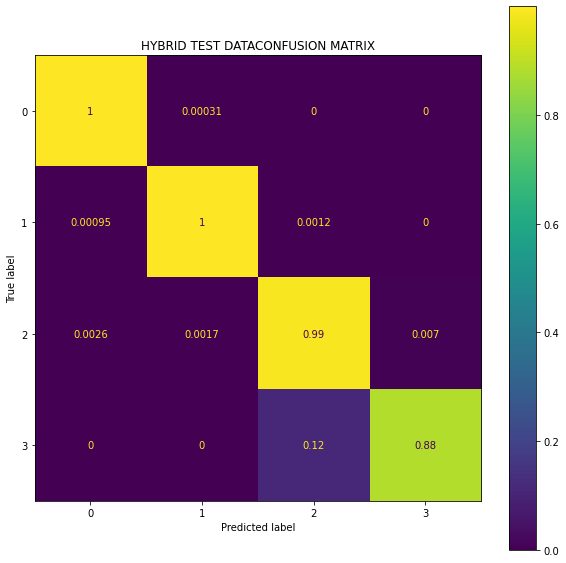


CLASSIFICATION REPORT
----------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15993
           1       1.00      1.00      1.00      4221
           2       0.99      0.99      0.99      1148
           3       0.89      0.88      0.89        77

    accuracy                           1.00     21439
   macro avg       0.97      0.97      0.97     21439
weighted avg       1.00      1.00      1.00     21439




In [26]:
print()
print('==============================')
print('==========HYBRID==============')
print('==============================')
print()
hybrid_eval_inc(len(x_train_class.index), len(x_test_class.index), x_train_class, y_train_class, x_test_class, y_test_class)

# Chosen Classifiers

First Layer (Intrusion Analysis) Classifier: Decision Tree classifier

Second Layer (Attack Class) Classifier: MLP-DT Classifier (Hybrid)

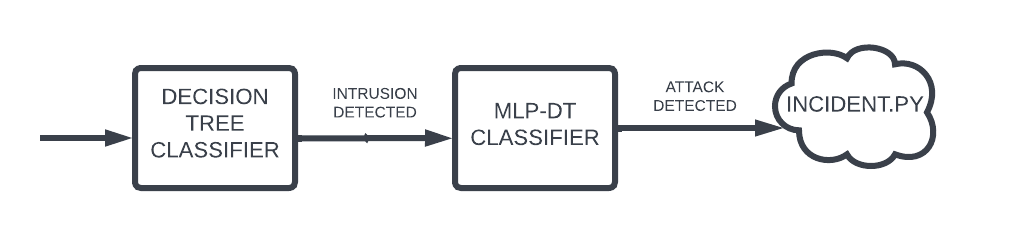

**EXPORT DATASETS TO TRAIN CHOSEN CLASSIFIERS**

In [27]:

x_train.to_csv('/content/drive/My Drive/DISSERTATION/simulation/x_train.csv')
y_train.to_csv('/content/drive/My Drive/DISSERTATION/simulation/y_train.csv')

x_test.to_csv('/content/drive/My Drive/DISSERTATION/simulation/x_test.csv')
y_test.to_csv('/content/drive/My Drive/DISSERTATION/simulation/y_test.csv')

x_train_class.to_csv('/content/drive/My Drive/DISSERTATION/simulation/x_train_class.csv')
y_train_class.to_csv('/content/drive/My Drive/DISSERTATION/simulation/y_train_class.csv')

x_test_class.to_csv('/content/drive/My Drive/DISSERTATION/simulation/x_test_class.csv')
y_test_class.to_csv('/content/drive/My Drive/DISSERTATION/simulation/y_test_class.csv')

simulation_data = sng_data_exp.sample(10000)
simulation_data.to_csv('/content/drive/My Drive/DISSERTATION/simulation/simulation_data.csv')


To continue the notebook, head over to the simulation.ipynb where the implementation of the two chosen classifiers is shown.